1. Dans scikit-learn, importe le dataset Iris, c'est un grand classique de la data. Il contient 3 espèces de fleurs (des iris) suivant leur longueur et largeur de pétale et de sépale.

2. Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.

3. Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette image. Tu peux prendre 2 dimensions de ton choix parmi les 4.

- Sur le graphique de gauche, tu dois afficher les points avec des couleurs différentes pour chaque cluster d'appartenance, ainsi que le centre de chaque cluster bien en évidence (ici les croix vertes).

- Sur le graphique de droite, tu dois afficher les points avec des couleurs différentes correspondant à leur espèce d'iris species

4. Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques
Idem pour 4 clusters

5. Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ?
Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? Et toi, visuellement, si tu ne savais pas qu'il y avait 3 espèces, tu en aurais trouvé combien ?


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

1. Dans scikit-learn, importe le dataset Iris, c'est un grand classique de la data. Il contient 3 espèces de fleurs (des iris) suivant leur longueur et largeur de pétale et de sépale.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv", sep = ",")

In [ ]:
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dummies = df["species"].str.get_dummies()

In [ ]:
df_fleurs = pd.concat([df, dummies], axis = 1)

In [ ]:
display(df_fleurs)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,0,1
146,6.3,2.5,5.0,1.9,virginica,0,0,1
147,6.5,3.0,5.2,2.0,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1


In [ ]:
df_fleurs = df_fleurs.drop("species", axis = 1)

2. Entraîne ton modèle pour qu’il trouve 3 clusters à partir des 4 colonnes numériques.

In [ ]:
X = df_fleurs[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=3)
modelKM.fit(X_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
print(modelKM.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
df_fleurs["cluster"] = modelKM.labels_

In [ ]:
display(df_fleurs.head())

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,cluster
0,5.1,3.5,1.4,0.2,1,0,0,1
1,4.9,3.0,1.4,0.2,1,0,0,1
2,4.7,3.2,1.3,0.2,1,0,0,1
3,4.6,3.1,1.5,0.2,1,0,0,1
4,5.0,3.6,1.4,0.2,1,0,0,1


In [ ]:
modelKM.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [ ]:
modelKM.inertia_

6.982216473785236

3. Produis une visualisation comparant le dataset de base avec les classes générées par le K-means en t’inspirant de cette image. Tu peux prendre 2 dimensions de ton choix parmi les 4.

- Sur le graphique de gauche, tu dois afficher les points avec des couleurs différentes pour chaque cluster d'appartenance, ainsi que le centre de chaque cluster bien en évidence (ici les croix vertes).

- Sur le graphique de droite, tu dois afficher les points avec des couleurs différentes correspondant à leur espèce d'iris species

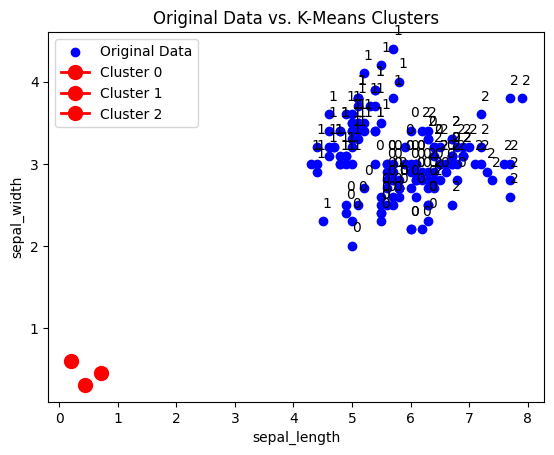

In [ ]:
import matplotlib.pyplot as plt

dimensions = ['sepal_length', 'sepal_width']
# Create a scatter plot of the original data
plt.scatter(df_fleurs[dimensions[0]], df_fleurs[dimensions[1]], c='blue', label='Original Data')

# Add cluster labels to each data point (optional)
for i, label in enumerate(modelKM.labels_):
    plt.annotate(label, (df_fleurs[dimensions[0]][i], df_fleurs[dimensions[1]][i]),
                 textcoords='offset points', xytext=(0, 10))  # Adjust offset as needed

# Add cluster centroids as markers (optional)
centroids = modelKM.cluster_centers_
for i, center in enumerate(centroids):
    plt.plot(center[0], center[1], marker='o', markersize=10,
            linewidth=2, color='red', label=f'Cluster {i}')

# Customize plot aesthetics
plt.xlabel(dimensions[0])
plt.ylabel(dimensions[1])
plt.title('Original Data vs. K-Means Clusters')
plt.legend()
plt.show()

In [ ]:
# Visualisation avec Plotly Express
fig1 = px.scatter(df, x = "sepal_length", y = "sepal_width", color = "petal_length", title = "Visualisation Dataset", width =600, height=600)
fig2 = px.scatter(df_fleurs, x="sepal_length", y="sepal_width", color="cluster", title="Visualisation des clusters", width=600, height=600)

fig1.show()
fig2.show()

4. Entraine un autre modèle sur 2 clusters, puis affiche les mêmes graphiques
Idem pour 4 clusters

2 clusters

In [ ]:
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=2, random_state=3)
modelKM.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=3)

In [ ]:
modelKM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
modelKM.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

In [ ]:
modelKM.inertia_

152.3479517603579

4 clusters

In [ ]:
from sklearn.cluster import KMeans
modelKM = KMeans(n_clusters=4, random_state=3)
modelKM.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=3)

In [ ]:
modelKM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 2, 0, 2, 2, 3, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0], dtype=int32)

In [ ]:
modelKM.cluster_centers_

array([[6.25714286, 2.86190476, 4.85      , 1.63333333],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.95      , 3.10666667, 5.86666667, 2.15333333],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [ ]:
modelKM.inertia_

57.255523809523815

5. Évalue ton modèle en utilisant la méthode Elbow, entre 2 et 10 clusters, quel nombre cluster semble optimal ?
Évalue ton modèle en utilisant la méthode Silhouette, entre 2 et 10 clusters, quel nombre de clusters semble optimal ? Et toi, visuellement, si tu ne savais pas qu'il y avait 3 espèces, tu en aurais trouvé combien ?

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Elbow method

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 11)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

2 : 0.8555777695266533
3 : 0.6480304904934434
4 : 0.5577656519366712
5 : 0.5087764081462801
6 : 0.4675941796958776
7 : 0.4381125733411078
8 : 0.41086768314893807
9 : 0.39617960125111984
10 : 0.38200691272484005


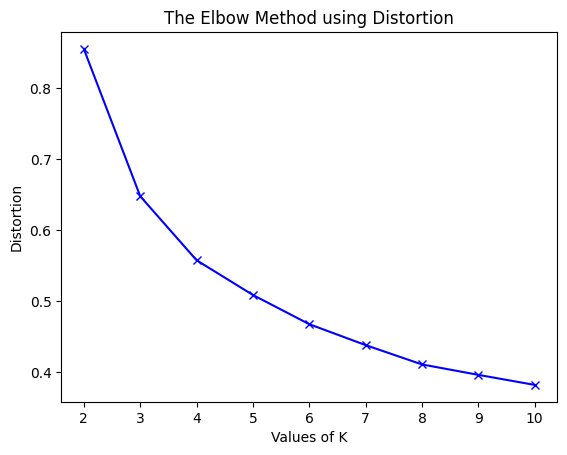

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Silhouette

In [ ]:
from sklearn.metrics  import silhouette_score
for k in range(2,11):
    modelKM = KMeans(n_clusters=k, random_state=3)
    modelKM.fit(X)
    print(silhouette_score(X, modelKM.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

0.6810461692117465
0.5528190123564102
0.4972176648710982
0.48874888709310654
0.36871053323330594
0.3568618172536383
0.3520039484603357
0.32397797972190856
0.3253350479791618


<ipython-input-65-35632cb97f37>:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



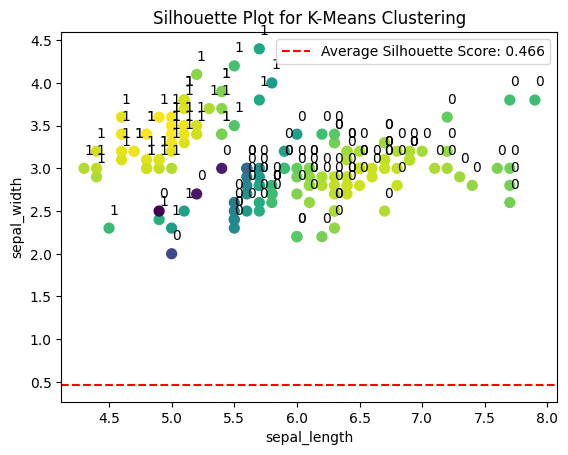

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

dimensions = ['sepal_length', 'sepal_width']

# Calculate silhouette scores for each data point
silhouette_values = silhouette_samples(df_fleurs[dimensions], kmeans.labels_)

# Calculate average silhouette score
silhouette_avg = silhouette_score(df_fleurs[dimensions], kmeans.labels_)
# Create a scatter plot of the silhouette values
plt.scatter(df_fleurs[dimensions[0]], df_fleurs[dimensions[1]],
            c=silhouette_values, cmap=cm.get_cmap('viridis'), s=50)

# Add cluster labels to each data point (optional)
for i, label in enumerate(kmeans.labels_):
    plt.annotate(label, (df_fleurs[dimensions[0]][i], df_fleurs[dimensions[1]][i]),
                 textcoords='offset points', xytext=(0, 10))  # Adjust offset as needed

# Draw a horizontal line at the average silhouette score
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label=f'Average Silhouette Score: {silhouette_avg:.3f}')

# Customize plot aesthetics
plt.xlabel(dimensions[0])
plt.ylabel(dimensions[1])
plt.title('Silhouette Plot for K-Means Clustering')
plt.legend()
plt.show()